In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df_train = pd.read_csv("fashion-mnist_train.csv")
df_test = pd.read_csv("fashion-mnist_test.csv")

In [39]:
# Visualize random products
training = np.asarray(df_train.drop('label', axis=1))
train_label = np.asarray(df_train['label'])

testing = np.asarray(df_test.drop('label', axis=1))
test_label = np.asarray(df_test['label'])

In [31]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
set(train_label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

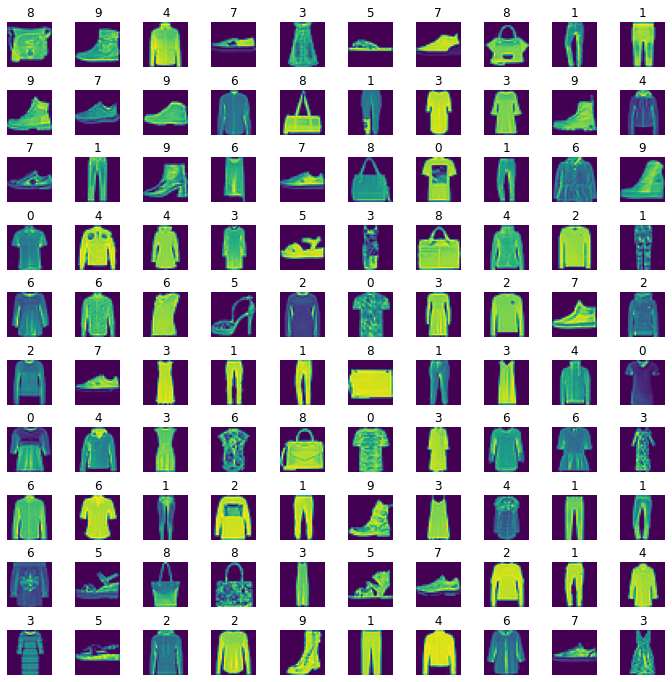

In [40]:
nrows = 10
ncols = 10
n = len(training)
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))

for i in range(nrows):
    for j in range(ncols):
        index = random.randint(0, n)
        axes[i][j].imshow(training[index].reshape(28, 28))
        axes[i][j].set_title(train_label[index])
        axes[i][j].axis("off")
plt.subplots_adjust(hspace=0.5)

In [42]:
training = training/255

In [43]:
testing = testing/255

In [45]:
training.shape

(60000, 784)

In [50]:
training = np.reshape(training, (-1, 28, 28, 1))
testing = np.reshape(testing, (-1, 28, 28, 1)) 

In [67]:
testing.shape

(10000, 28, 28, 1)

In [68]:
# Split the data into train and val data
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(training, train_label, test_size=0.2, random_state=1)

In [66]:
x_train.shape

(48000, 784)

In [74]:
# Model creation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [75]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [76]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)              

In [77]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [78]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/5
1500/1500 [==============================] - 48s 32ms/step - loss: 0.5277 - accuracy: 0.8080 - val_loss: 0.3846 - val_accuracy: 0.8629
Epoch 2/5
1500/1500 [==============================] - 47s 32ms/step - loss: 0.3641 - accuracy: 0.8668 - val_loss: 0.3213 - val_accuracy: 0.8847
Epoch 3/5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.3200 - accuracy: 0.8823 - val_loss: 0.2913 - val_accuracy: 0.8973
Epoch 4/5
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2884 - accuracy: 0.8939 - val_loss: 0.2734 - val_accuracy: 0.8997
Epoch 5/5
1500/1500 [==============================] - 52s 35ms/step - loss: 0.2686 - accuracy: 0.8992 - val_loss: 0.2791 - val_accuracy: 0.8973


In [80]:
model.evaluate(testing, test_label)

313/313 [==============================] - 4s 12ms/step - loss: 0.2686 - accuracy: 0.8992


[0.2685816287994385, 0.8992000222206116]

In [85]:
y_pred = np.argmax(model.predict(testing), axis=-1)

In [81]:
#Visualize the prediction

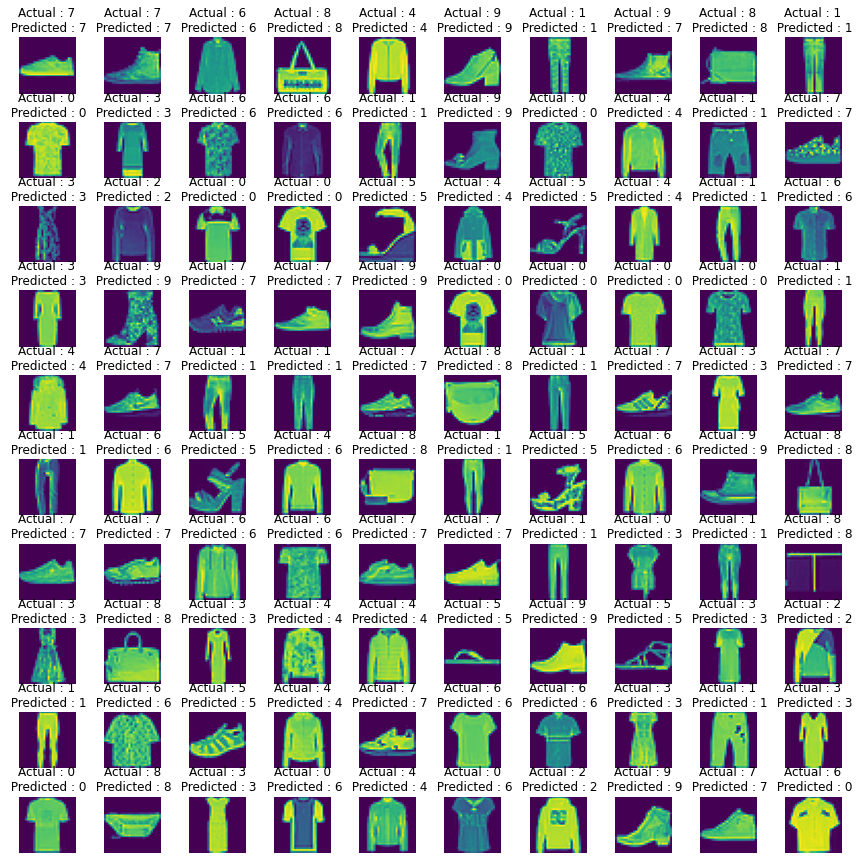

In [87]:
nrows = 10
ncols = 10

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

for i in range(nrows):
    for j in range(ncols):
        index = random.randint(0, len(testing))
        axes[i][j].imshow(testing[index].reshape(28, 28))
        axes[i][j].set_title("Actual : {:d}\n Predicted : {:d}".format(test_label[index], y_pred[index]))
        axes[i][j].axis("off")
plt.subplots_adjust(hspace=0.5)

In [88]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(test_label, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.88      0.82      0.85      1000
           3       0.86      0.96      0.90      1000
           4       0.87      0.81      0.84      1000
           5       0.98      0.97      0.98      1000
           6       0.68      0.79      0.73      1000
           7       0.95      0.96      0.95      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

